# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [3]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('E:/Nextcloud/Universidad/Analisis de datos/Tarea 3/Dataset Regresion Logistica/archive/heart_cleveland_upload.csv')

In [7]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


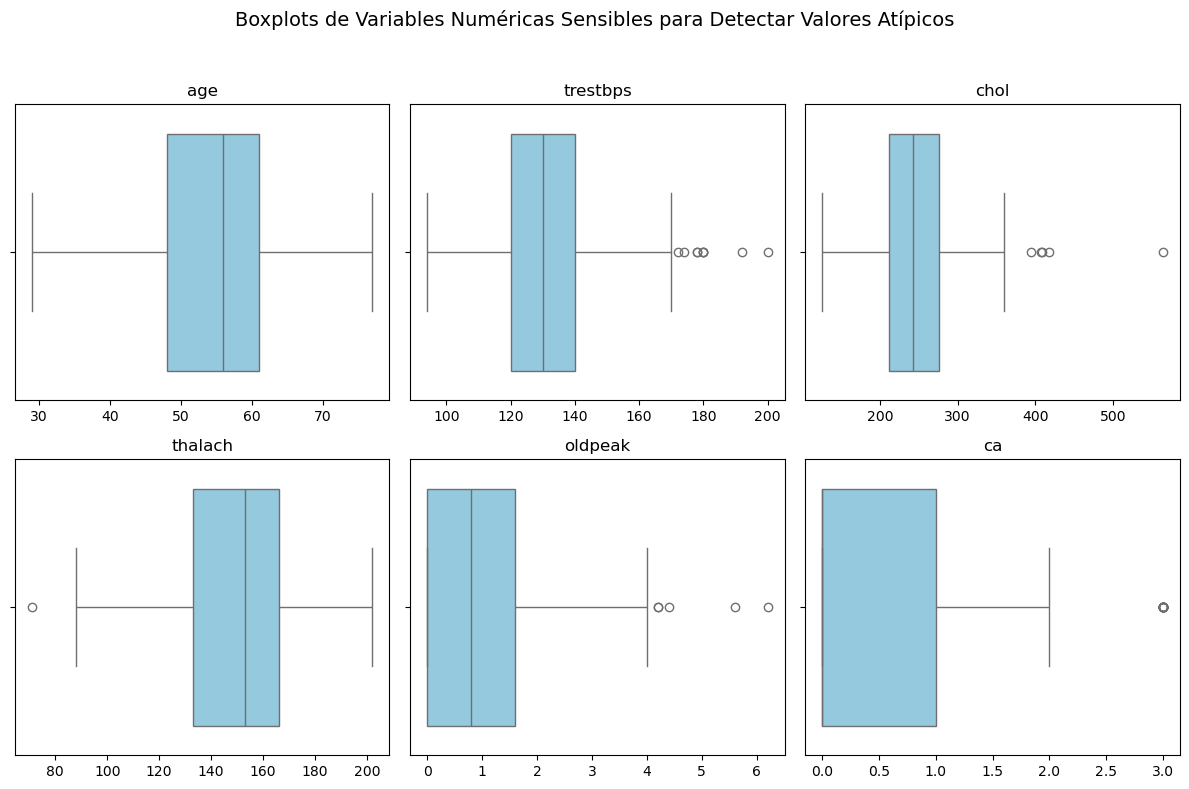

In [11]:
#Identificación de Datos Atípicos

# Seleccionar columnas numéricas sensibles de analisis

columnas_sensibles = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Crear subplots

plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_sensibles, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Datos[columna], color='skyblue')
    plt.title(columna)
    plt.xlabel('')

plt.suptitle('Boxplots de Variables Numéricas Sensibles para Detectar Valores Atípicos', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [13]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Colesterol (chol): ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión en reposo (trestbps) : ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima (thalach) ",Datos['thalach'].isin([0]).sum())


# oldpeak: Aunque fisiológicamente puede haber 0 depresión del ST, podría ser útil revisar si todos esos valores tienen coherencia clínica.
# ca: Esto sí es posible clínicamente (0 vasos coloreados), pero es un valor muy frecuente y hay que revisar si está relacionado con otras variables como thal.


Cantidad de Registros con cero en Colesterol (chol):  0
Cantidad de Registros con cero en Presión en reposo (trestbps) :  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima (thalach)  0


In [17]:
# registros con valores atípicos en cada variable

colesterol_fuera_de_rango = Datos[(Datos['chol'] < 113.5) | (Datos['chol'] > 373.5)]
presion_en_reposo_fuera_de_rango = Datos[(Datos['trestbps'] < 90) | (Datos['trestbps'] > 170)]
frecuencia_cardiaca_fuera_de_rango = Datos[(Datos['thalach'] < 83.5) | (Datos['thalach'] > 215.5)]
depresion_st_fuera_de_rango = Datos[Datos['oldpeak'] > 4.0]
vasos_coloreados_fuera_de_rango = Datos[Datos['ca'] > 2.5]  # Aunque clínicamente hasta 3 es válido

# Unir todos los registros con al menos un valor fuera del rango
registros_fuera_de_rango = pd.concat([
    colesterol_fuera_de_rango,
    presion_en_reposo_fuera_de_rango,
    frecuencia_cardiaca_fuera_de_rango,
    depresion_st_fuera_de_rango,
    vasos_coloreados_fuera_de_rango
]).drop_duplicates()

# Mostrar resultados
print("Cantidad total de registros con al menos un valor atípico:", len(registros_fuera_de_rango))
registros_fuera_de_rango.head()

Cantidad total de registros con al menos un valor atípico: 35


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
79,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0
83,65,0,2,140,417,1,2,157,0,0.8,0,1,0,0
180,63,0,3,150,407,0,2,154,0,4.0,1,3,2,1
188,62,0,3,140,394,0,2,157,0,1.2,1,0,0,0
238,56,0,3,134,409,0,2,150,1,1.9,1,2,2,1


In [23]:
# Filtrar el DataFrame principal para eliminar registros con valores fuera de los rangos definidos
Datos = Datos[
    (Datos['chol'] >= 113.5) & (Datos['chol'] <= 373.5) &
    (Datos['trestbps'] >= 90) & (Datos['trestbps'] <= 170) &
    (Datos['thalach'] >= 83.5) & (Datos['thalach'] <= 215.5) &
    (Datos['oldpeak'] <= 4.0) &
    (Datos['ca'] <= 2.5)  # Recordando que clínicamente puede ir hasta 3
]

# Mostrar cuántos registros quedaron después de eliminar los atípicos
print("Cantidad de registros después de limpiar:", len(Datos))
Datos.head()

Cantidad de registros después de limpiar: 262


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [25]:
#Validar el filtrado de valores atipcios (Debe dar 0)

# registros con valores atípicos en cada variable

colesterol_fuera_de_rango = Datos[(Datos['chol'] < 113.5) | (Datos['chol'] > 373.5)]
presion_en_reposo_fuera_de_rango = Datos[(Datos['trestbps'] < 90) | (Datos['trestbps'] > 170)]
frecuencia_cardiaca_fuera_de_rango = Datos[(Datos['thalach'] < 83.5) | (Datos['thalach'] > 215.5)]
depresion_st_fuera_de_rango = Datos[Datos['oldpeak'] > 4.0]
vasos_coloreados_fuera_de_rango = Datos[Datos['ca'] > 2.5]  # Aunque clínicamente hasta 3 es válido

# Unir todos los registros con al menos un valor fuera del rango
registros_fuera_de_rango = pd.concat([
    colesterol_fuera_de_rango,
    presion_en_reposo_fuera_de_rango,
    frecuencia_cardiaca_fuera_de_rango,
    depresion_st_fuera_de_rango,
    vasos_coloreados_fuera_de_rango
]).drop_duplicates()

# Mostrar resultados
print("Cantidad total de registros con al menos un valor atípico:", len(registros_fuera_de_rango))
registros_fuera_de_rango.head()

Cantidad total de registros con al menos un valor atípico: 0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition


In [27]:
#Revisión del tipo de datos y datos faltantes

Datos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        262 non-null    int64  
 1   sex        262 non-null    int64  
 2   cp         262 non-null    int64  
 3   trestbps   262 non-null    int64  
 4   chol       262 non-null    int64  
 5   fbs        262 non-null    int64  
 6   restecg    262 non-null    int64  
 7   thalach    262 non-null    int64  
 8   exang      262 non-null    int64  
 9   oldpeak    262 non-null    float64
 10  slope      262 non-null    int64  
 11  ca         262 non-null    int64  
 12  thal       262 non-null    int64  
 13  condition  262 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.7 KB


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Caracteristica de interes Enfermedad cardiaca, Variable objetivo "condition"

0 = sin enfermedad cardíaca

1 = con enfermedad cardíaca

In [46]:
# Total de personas con enferemedad cardica

Datos['condition'].value_counts()

condition
0    151
1    111
Name: count, dtype: int64

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [40]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [42]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
204   60    1   3       130   253    0        0      144      1      1.4   
17    51    1   0       125   213    0        2      125      1      1.4   
59    44    1   1       120   263    0        0      173      0      0.0   
107   54    1   2       125   273    0        2      152      0      0.5   
241   55    1   3       160   289    0        2      145      1      0.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
80    67    1   2       152   212    0        2      150      0      0.8   
81    67    0   2       152   277    0        0      172      0      0.0   
278   45    1   3       115   260    0        2      185      0      0.0   
215   58    0   3       100   248    0        2      122      0      1.0   
37    56    0   1       140   294    0        2      153      0      1.3   

     slope  ca  thal  
204      0   1     2  
17       0   1     0  
59       0   0    

In [44]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
276   45    0   3       138   236    0        2      152      1      0.2   
112   54    0   2       108   267    0        2      167      0      0.0   
247   54    1   3       110   206    0        2      108      1      0.0   
156   71    0   3       112   149    0        0      125      0      1.6   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
36    56    1   1       120   240    0        0      169      0      0.0   
78    68    1   2       118   277    0        0      151      0      1.0   
92    61    1   2       150   243    1        0      137      1      1.0   
123   51    1   2        94   227    0        0      154      1      0.0   
15    52    1   0       118   186    0        2      190      0      0.0   

     slope  ca  thal  
276      1   0     0  
112      0   0     0  
247      1   1    

# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [49]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [51]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
276,45,0,3,138,236,0,2,152,1,0.2,1,0,0
112,54,0,2,108,267,0,2,167,0,0.0,0,0,0
247,54,1,3,110,206,0,2,108,1,0.0,1,1,0
156,71,0,3,112,149,0,0,125,0,1.6,1,0,0
133,47,1,2,108,243,0,0,152,0,0.0,0,0,0
116,52,0,2,136,196,0,2,169,0,0.1,1,0,0
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0
261,51,1,3,140,261,0,2,186,1,0.0,0,0,0
269,48,1,3,130,256,1,2,150,1,0.0,0,2,2
244,54,1,3,124,266,0,2,109,1,2.2,1,1,2


In [53]:
print (Prediccion)

[0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [56]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.86      0.86      0.86        28

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

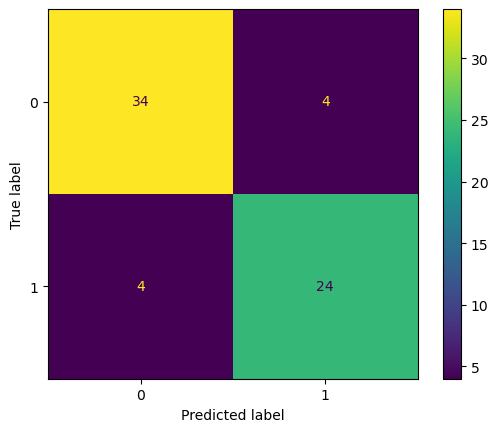

In [59]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

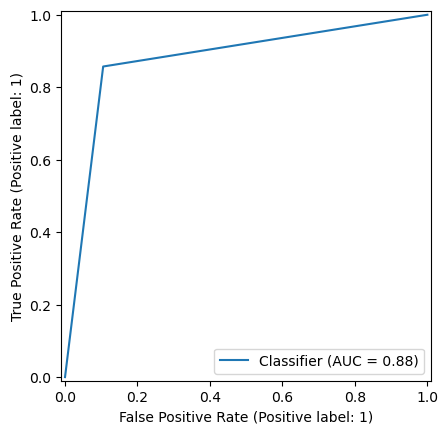

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos

Precisión: La precisión del modelo mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. En este caso, para la clase "0" (no tiene enfermedad cardíaca), la precisión es 0.89, lo que significa que el 89% de las predicciones positivas para esta clase fueron correctas. Para la clase "1" (enfermedad cardíaca), la precisión es 0.86, lo que indica que el 86% de las predicciones positivas realizadas por el modelo fueron correctas.

Recall: El recall, también conocido como sensibilidad, mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Para la clase "0", el recall es 0.89, lo que indica que el modelo identificó correctamente al 89% de los pacientes sin enfermedad cardíaca. Para la clase "1", el recall es 0.86, lo que indica que el modelo identificó correctamente al 86% de todos los pacientes con enfermedad cardíaca.

F1 Score: El F1 Score es la media armónica de la precisión y el recall. Para la clase "0", el F1 Score es 0.89, mientras que para la clase "1", el F1 Score es 0.86. Un F1 Score más alto indica un buen equilibrio entre precisión y recall, y en este caso, los valores sugieren que el modelo tiene un rendimiento bastante equilibrado.

Matriz de Confusión: La matriz de confusión muestra la capacidad del modelo para clasificar correctamente las instancias en las categorías correctas:

Verdaderos Negativos (TN): El número de observaciones que fueron correctamente clasificadas como no teniendo la enfermedad cardíaca es 34.

Verdaderos Positivos (TP): El número de observaciones que fueron correctamente clasificadas como teniendo la enfermedad cardíaca es 24.

Falsos Positivos (FP): El número de observaciones que fueron incorrectamente clasificadas como teniendo la enfermedad cardíaca es 4.

Falsos Negativos (FN): El número de observaciones que fueron incorrectamente clasificadas como no teniendo la enfermedad cardíaca es 4.

Curva ROC y AUC: El AUC (Área Bajo la Curva ROC) obtenido es 0.88, lo que significa que el modelo tiene un 88% de capacidad para discriminar correctamente entre los pacientes con y sin enfermedad cardíaca en todos los umbrales de clasificación. Este valor es bastante bueno, lo que indica que el modelo tiene una capacidad sólida para clasificar las instancias correctamente.

el modelo de regresión logística tiene un desempeño bastante sólido, con una alta precisión, recall y F1 Score para ambas clases. La matriz de confusión muestra que el modelo comete pocos errores al clasificar las instancias, y el AUC sugiere que el modelo tiene una buena capacidad de discriminación entre los pacientes con y sin enfermedad cardíaca.